<font font size="6px" color= "red">Text classfication using Spacy word vectors</font>

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv("D:\ML Coding Ninza\Coding\Dataset\True.csv")
df2 = pd.read_csv("D:\ML Coding Ninza\Coding\Dataset\Fake.csv")

In [5]:
print(df1.shape)
df1.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print(df2.shape)
df2.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### add column in both dataframe

In [7]:
df1['target'] = 1
df2['target'] = 0

In [8]:
df1.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df2.head(2)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


*Take a 5000 sample of both dataframe*

In [10]:
df1 = df1.sample(5000).reset_index(drop = True)
df2 = df2.sample(5000).reset_index(drop = True)

In [11]:
df1.head()

,title,text,subject,date,target
0,"For hardline West Bank settlers, Jared Kushner...","BET EL, West Bank (Reuters) - For many in the ...",politicsNews,"February 1, 2017",1
1,Catalan election to return hung parliament: poll,MADRID (Reuters) - An election in Catalonia wi...,worldnews,"December 15, 2017",1
2,Trump knew for weeks that aide was being misle...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 14, 2017",1
3,Fistfights erupt in Uganda's parliament amid m...,KAMPALA (Reuters) - Fistfights and chair-throw...,worldnews,"September 26, 2017",1
4,Japan pledges to help Philippines rebuild Marawi,TOKYO (Reuters) - Japan said on Monday it will...,worldnews,"October 30, 2017",1


In [12]:
df2.head()

,title,text,subject,date,target
0,U.S. Women’s Soccer Star Megan Rapinoe Kneels...,The protest is growing.Most people don t seem ...,News,"September 5, 2016",0
1,BREAKING: VIOLENT HILLARY THUGS Beat Man Holdi...,Protester with Rape sign is tackled at #Clin...,left-news,"Oct 13, 2016",0
2,Lisa Bloom Has FRIGHTENING Warning For The Fu...,Donald Trump is a misogynist. We all know that...,News,"December 11, 2016",0
3,Bernie Sanders Just Received A Crucial Nevada...,Bernie Sanders just received a major endorseme...,News,"February 19, 2016",0
4,Trump Whines About How Divided Our Nation Is ...,After a year and half of doing nothing but div...,News,"January 15, 2017",0


*merge df1 and df2 into df*

In [13]:
df = pd.concat([df1,df2],) #concat is a pandas func used to concatenate two dataframe
#axis = 0(row) by default
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
print(df.shape)
print(df.target[:20])

(10000, 5)
0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: target, dtype: int64


In [15]:
df.target.value_counts()

0    5000
1    5000
Name: target, dtype: int64

<font font size="6px" color= "Green">***Now we r using Spacy***</font>

In [16]:
import spacy

In [17]:
nlp = spacy.load("en_core_web_lg")

In [18]:
sent = df.text[0]
sent

'Not that anyone should be surprised by this insanity after all, it s California where rules, laws and morals don t really apply to liberals Arriving naked at a final exam is one of the most common nightmares for students, according to Psychology Today. At the University of California San Diego, however, the naked final exam is a requirement for a class in the visual arts department.Students are required to perform  a gesture that traces, outlines or speaks about your  erotic self(s),  according to the course syllabus. In the performance, all of the students are naked, along with the professor, Ricardo Dominguez, who has taught the class for 11 years. It s the standard canvas for performance art and body art,  Dominguez told local ABC News affiliate KGTV.  It is all very controlled If they are uncomfortable with this gesture, they should not take the class.  He was defending the class after one mother spoke out, claiming the requirement was not clear and was a  perversion. According to

In [19]:
doc = nlp("sent")
doc.vector

array([-2.9594e+00, -2.8602e+00,  5.0317e-02,  7.0148e-01,  6.5911e+00,
        4.4706e-01,  1.9921e+00, -1.0834e+00,  1.1641e+00,  7.7718e-01,
        3.4203e+00,  1.4933e+00, -4.9070e+00,  5.7480e+00, -2.9016e+00,
       -3.5431e-01,  3.7235e+00,  1.8183e+00,  2.2252e+00,  4.0988e+00,
       -5.6589e+00, -8.4234e+00, -5.6137e+00,  2.2756e+00,  2.7798e+00,
       -9.8942e-01,  4.2761e+00, -8.2938e-01,  2.9379e+00, -5.3305e+00,
        2.9162e+00, -6.4013e+00, -1.5244e+00,  5.7230e-01, -1.7996e-01,
       -3.4273e+00,  2.2657e+00, -3.7643e+00,  6.2760e+00,  1.3890e+00,
       -5.8589e+00,  3.5527e-01, -1.7336e+00,  3.9681e+00, -1.6672e-01,
        4.5473e-01,  2.2740e+00, -1.0659e-01, -1.5461e+00, -2.3502e+00,
        5.2379e+00, -1.5110e+00,  1.8348e-01,  5.1551e-01,  2.0120e+00,
       -4.6027e-01, -6.0780e-01, -2.9870e+00,  2.4556e+00, -7.1820e-01,
       -6.9962e-01, -3.6060e-01,  2.0749e-01, -1.1818e+00,  8.2038e+00,
        3.9623e+00,  2.7840e+00, -8.1896e-02, -2.6017e+00,  2.29

In [20]:
# make a function for using Spacy word vector
def word_vector(sent):
    doc = nlp(sent)

    return doc.vector
    
        


In [21]:
word_vector(df.text[2])

array([-1.6787069 ,  0.5447232 , -2.1349845 ,  0.39863253,  3.2435696 ,
        0.7505763 ,  0.18419595,  4.3242197 , -0.4656352 , -0.6576579 ,
        4.843364  ,  1.2365891 , -2.9212723 ,  0.8727878 ,  1.2568126 ,
        1.3369695 ,  0.5816368 , -1.4057708 , -1.4901576 , -1.1603396 ,
        0.9607968 , -0.3733816 , -1.0810263 , -0.56023896, -0.3891002 ,
       -1.3006063 , -2.0999894 , -0.7859384 , -0.12262595,  1.1809704 ,
        1.105351  , -0.65118676, -0.30178475, -1.6821325 , -2.026614  ,
       -1.0986936 , -0.69194144,  1.136917  ,  1.1690929 ,  0.94534516,
        0.23761088,  0.42489293,  0.30225924,  0.6663203 , -1.3429253 ,
        1.3189859 , -0.03314042, -2.2363074 , -0.6971842 ,  2.2603981 ,
       -1.3405416 ,  1.4090313 ,  0.5804519 , -3.9939818 , -0.66034013,
        0.16368221,  0.02654946,  0.748512  ,  1.2538785 ,  0.11487815,
        0.77981335, -0.43466875, -0.02399412, -1.7127122 ,  2.5677242 ,
        1.5583771 , -2.463931  , -2.124285  ,  0.6021237 ,  1.88

In [22]:
df['vector'] = df['text'].apply(word_vector)

In [54]:
df.head()

,title,text,subject,date,target,vector
0,MOTHER OUTRAGED OVER DAUGHTER BEING ASKED TO A...,Not that anyone should be surprised by this in...,left-news,"May 10, 2015",0,"[-2.4173713, 0.04992151, -1.3127843, 0.0763101..."
1,BOILER ROOM – EP #47 – Establishment Hitmen & ...,Tune in to the Alternate Current Radio Network...,US_News,"March 10, 2016",0,"[-1.4987497, -0.85132474, -1.0763875, 0.576292..."
2,"Trump BAILS On Teleprompter, Insults His Own ...",Despite not having any time to attend critical...,News,"December 16, 2016",0,"[-1.6787069, 0.5447232, -2.1349845, 0.39863253..."
3,WATCH: Republican Runs Into A Buzzsaw During ...,Remember when Republicans wasted millions of d...,News,"February 22, 2017",0,"[-1.6364673, 0.83632517, -2.7284322, 0.3237148..."
4,Kansas governor eyes tobacco bonds for budget fix,(Reuters) - Kansas Governor Sam Brownback offe...,politicsNews,"April 21, 2016",1,"[-2.7853827, 0.06117026, -2.8805842, 1.0275064..."


<font font size="6px" color= "yellow">Model training</font>

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test= train_test_split(df.vector, df.target, test_size = 0.2, random_state = 2002)

In [83]:
X_train

2697    [-1.1765132, 1.1415099, -2.7665637, -0.3490375...
1361    [-1.8744354, 0.3488976, -1.9026514, 0.6248463,...
8208    [-1.0711887, 2.2075603, -2.177105, -0.27865118...
6336    [-2.3101308, 0.8244837, -2.2412467, 0.73557687...
3141    [-2.5459235, 0.22958979, -1.977623, 0.5653404,...
                              ...                        
8783    [-2.3061047, 0.7681667, -2.3912818, 0.5357157,...
9559    [-1.571258, 1.2708516, -1.5384413, 1.0068055, ...
3853    [-1.8577826, 0.7267052, -1.84998, 0.06462319, ...
904     [-1.8330709, -0.12084502, -0.7440435, 0.322534...
4498    [-2.3893855, 0.18748108, -1.5239509, 0.5631270...
Name: vector, Length: 8000, dtype: object

<font font size="6px" color= "Yellow">Naive Bayes Classifier</font>

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
clf =MultinomialNB()
# clf.fit(X_train, y_train)
# The above line shows the below error
# Error -> only size-1 arrays can be converted to Python scalars
#Here, the model is expecting 2-d np array . So, we need to convert it into 2-d array

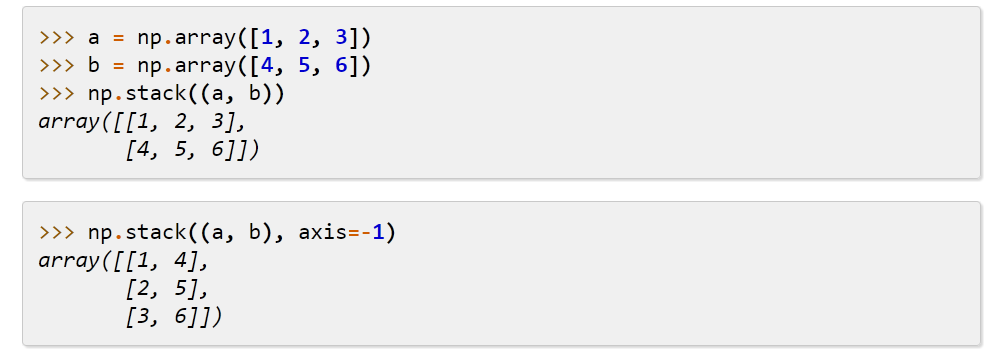

In [86]:
# make a 2-d vector using numpy stack
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [87]:
print(X_train_2d)

[[-1.1765132   1.1415099  -2.7665637  ... -0.64788973 -4.056596
   1.356412  ]
 [-1.8744354   0.3488976  -1.9026514  ... -1.2027428  -1.8612745
   0.7960992 ]
 [-1.0711887   2.2075603  -2.177105   ... -0.8006663  -2.7676604
   1.6804557 ]
 ...
 [-1.8577826   0.7267052  -1.84998    ... -0.74556875 -2.46882
   0.907982  ]
 [-1.8330709  -0.12084502 -0.7440435  ... -0.8367772  -1.2839777
   0.64932126]
 [-2.3893855   0.18748108 -1.5239509  ... -1.7843059  -1.8736209
   0.80132186]]


Here the negative values are present in training data. So, we need to scale it between 0 and 1 using MinMaxScalar

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler= MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.fit_transform(X_test_2d)


In [90]:
clf =MultinomialNB()
clf.fit(X_train_scaled, y_train)

MultinomialNB()

In [91]:
y_pred = clf.predict(X_test_scaled)

Find the accuracy of the model 

In [94]:
from sklearn.metrics import accuracy_score ,classification_report

In [97]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1014
           1       0.84      0.91      0.87       986

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



0.8705

<font font size="6px" color= "Yellow">K Nearest Neighbour Classifier</font>

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
clf1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')


In [140]:
clf1.fit(X_train_2d, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [142]:
y_pred1 = clf1.predict(X_test_2d)

In [143]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1014
           1       0.94      0.95      0.94       986

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



0.942

Here the KNN is doing great job because we have only 300 dimention vector, where in the other nlp model like bag_of_word, n_gram etc we have thousands of dimention vector.
